In [146]:
import pandas as pd
import matplotlib.pyplot as plt


Getting the CSV file names (as generated by `RMS.ipynb`)

In [147]:
datadir = './data/'
prefix = 'dao_'
calcs = ['noNAG',
         #'noNAG_TRE5',
         #'noNAG_TRE25',
         #'noNAG_TRE100',
         #'noNAG_TRE250',
         'noNAG_TRE500']
label_list = ['TRE0','TRE5','TRE25','TRE100','TRE250','TRE500']
label_list = ['TRE0','TRE500']
plots = ['EKTOT','EPTOT','ETOT','PRES','RG','RMSD','TEMP']
plots = ['RG','RMSD','_CARMSF','_CGRMSF']
#plots_titles = ['$R_\mathrm{g}$','RMSD','RMSF$_{\mathrm{C}\alpha}$','RMSF$_{\mathrm{C}\gamma}$']
plots_titles = ['Radius of gyration','RMSD','C$\\alpha$ RMSF','C$\\gamma$ RMSF']
datafiles = ['{0}{1}{2}.csv'.format(prefix,calc,plot) for calc in calcs for plot in plots]
print(datafiles)
print(plots_titles)

['dao_noNAGRG.csv', 'dao_noNAGRMSD.csv', 'dao_noNAG_CARMSF.csv', 'dao_noNAG_CGRMSF.csv', 'dao_noNAG_TRE500RG.csv', 'dao_noNAG_TRE500RMSD.csv', 'dao_noNAG_TRE500_CARMSF.csv', 'dao_noNAG_TRE500_CGRMSF.csv']
['Radius of gyration', 'RMSD', 'C$\\alpha$ RMSF', 'C$\\gamma$ RMSF']


graphing joint plots for the different calculations

In [148]:
dfiles=[]

for plot in plots:
    for calc in calcs:
        datafile = datadir+'{0}{1}{2}.csv'.format(prefix,calc,plot)
        dfiles.append(datafile)    

print(dfiles)

['./data/dao_noNAGRG.csv', './data/dao_noNAG_TRE500RG.csv', './data/dao_noNAGRMSD.csv', './data/dao_noNAG_TRE500RMSD.csv', './data/dao_noNAG_CARMSF.csv', './data/dao_noNAG_TRE500_CARMSF.csv', './data/dao_noNAG_CGRMSF.csv', './data/dao_noNAG_TRE500_CGRMSF.csv']


now plot using subplots

<Figure size 900x1200 with 0 Axes>

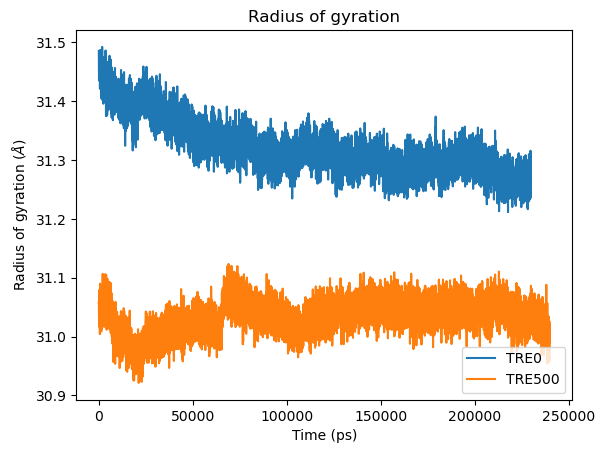

<Figure size 900x1200 with 0 Axes>

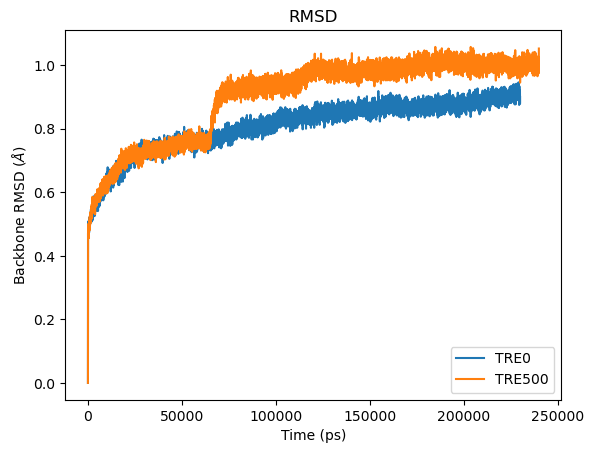

<Figure size 900x1200 with 0 Axes>

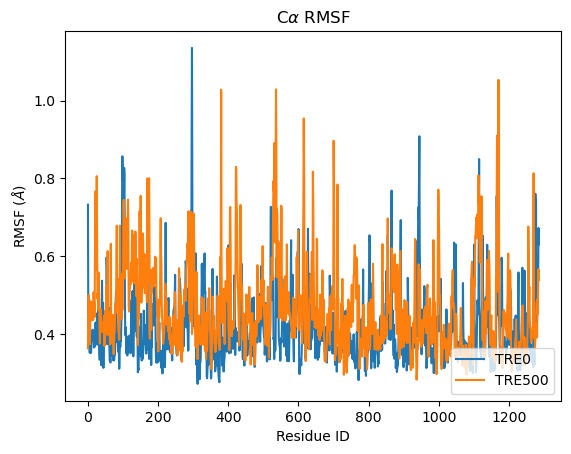

<Figure size 900x1200 with 0 Axes>

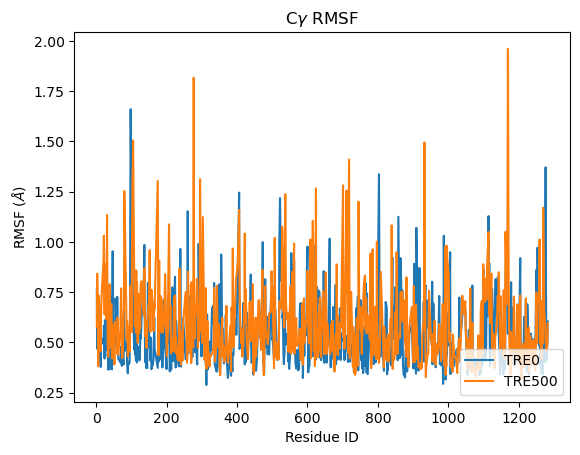

In [149]:
for n, plot in enumerate(plots):
    plt.figure(figsize=(9,12))
    fig, ax = plt.subplots()
 
    ax.set_title(plots_titles[n])
 
    for calc in calcs:
        datafile = datadir+'{0}{1}{2}.csv'.format(prefix,calc,plot)
        df=pd.read_csv(datafile)
        x_name = df.columns[0]
        y_name = df.columns[1]
        x=df[x_name]
        y=df[y_name]

        #ax.ticklabel_format(useMathText=True,scilimits=(0,0))
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.plot(x,y,label=calc)
        labels=label_list
        plt.legend(labels,loc='lower right')
        plt.savefig('../text/figures/'+plots[n]+'.png')



Radius of gyration
RMSD
C$\alpha$ RMSF
C$\gamma$ RMSF


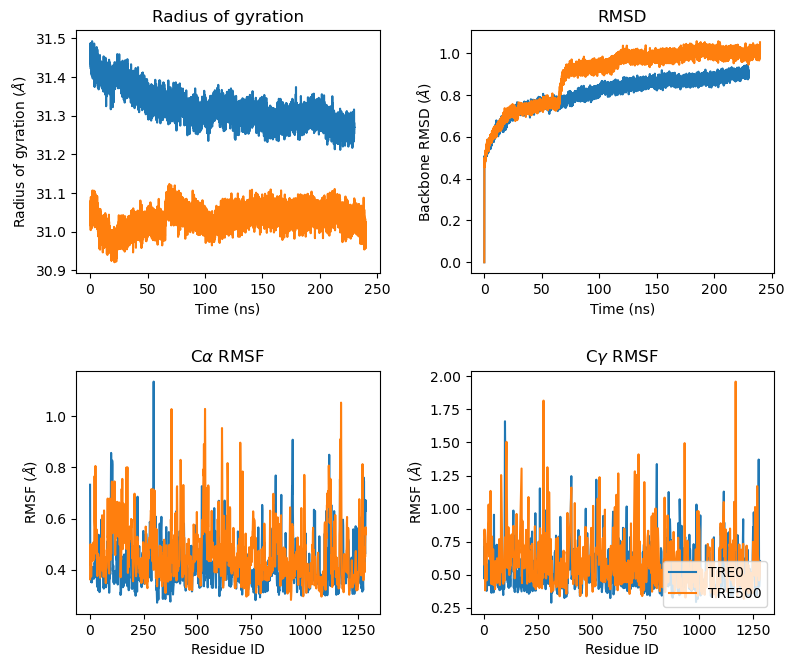

In [150]:
plt.figure(figsize=(9,12))
plt.subplots_adjust(hspace=0.4,wspace=0.3)
#plt.suptitle("Summary plots",fontsize=18, y= 0.95)

yplot=[]
for n, plot in enumerate(plots):
    ax = plt.subplot(3,2,n+1)
    print(plots_titles[n])
    ax.set_title(plots_titles[n])
 
    for calc in calcs:
        datafile = datadir+'{0}{1}{2}.csv'.format(prefix,calc,plot)
        df=pd.read_csv(datafile)
        x_name = df.columns[0]


        y_name = df.columns[1]
        x=df[x_name]
        y=df[y_name]
        yplot.append(y)

        if x_name == "Time (ps)":
            x_name = "Time (ns)"
            x=x/1000

        #ax.ticklabel_format(useMathText=True,scilimits=(0,0))
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.plot(x,y,label=calc)
handles, labels = plt.gca().get_legend_handles_labels()
labels=label_list
plt.legend(labels,loc='lower right')
plt.savefig('../text/figures/summary.png')

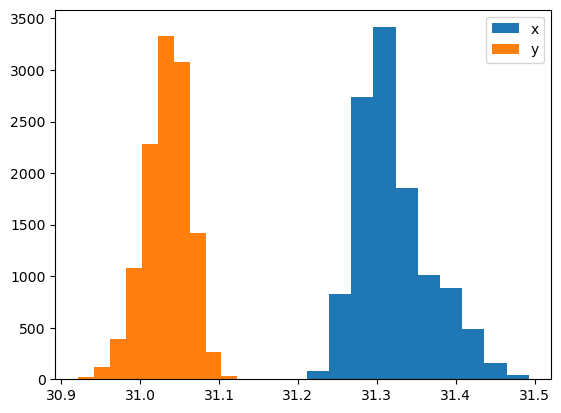

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=31.12340491384036, statistic_sign=-1)

In [151]:
# run KS test between the two radius of gyration
from scipy import stats


plt.hist(yplot[0],label='x')
plt.hist(yplot[1],label='y')
plt.legend(loc='upper right')
plt.show()

stats.kstest(yplot[0],yplot[1])